In [61]:
import pandas as pd

data = pd.read_csv('광진구사고데이터.csv', encoding = 'UTF-8')

#출처 = 교통사고분석시스템 GIS 서울광진경찰서 사고분석

In [62]:
print(data.shape)
print(data.columns)
data.head()
#데이터 개수 = 2513개 , 20년부터 22년까지

(2513, 22)
Index(['사고번호', '발생년월', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령대', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령대',
       '피해운전자 상해정도'],
      dtype='object')


,사고번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2020010100100332,2020년 1월,수요일,서울특별시 광진구 구의동,중상사고,0,2,6,1,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,승용,남,65세 이상,경상
1,2020010200100441,2020년 1월,목요일,서울특별시 광진구 중곡동,부상신고사고,0,0,0,1,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,남,51-60세,상해없음,보행자,남,12세 이하,부상신고
2,2020010300100519,2020년 1월,금요일,서울특별시 광진구 화양동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,41-50세,상해없음,보행자,여,65세 이상,중상
3,2020010400100306,2020년 1월,토요일,서울특별시 광진구 자양동,경상사고,0,0,1,0,차대차 - 충돌,...,맑음,단일로 - 기타,자전거,남,61-64세,경상,자전거,여,13-20세,상해없음
4,2020010400100346,2020년 1월,토요일,서울특별시 광진구 중곡동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,교차로 - 교차로안,이륜,남,65세 이상,상해없음,이륜,남,21-30세,경상


In [63]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# MacBook의 시스템 폰트 설정 (AppleGothic 사용)
plt.rc('font', family='AppleGothic')

# 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

1. 요일 중 어떤요일이 가장 많은지

In [64]:
day_counts = data['요일'].value_counts()
print(day_counts)

요일
금요일    397
수요일    382
토요일    375
화요일    367
월요일    352
목요일    348
일요일    292
Name: count, dtype: int64


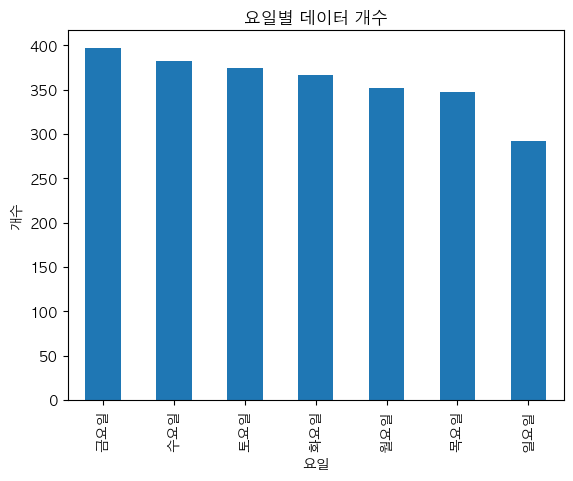

In [83]:
import matplotlib.pyplot as plt
import random
# 요일별 데이터 시각화
day_counts.plot(kind='bar')
plt.title('요일별 데이터 개수')
plt.xlabel('요일')
plt.ylabel('개수')
plt.show()

2020년부터 2022년까지 사고데이터를 조사해 보았을 때 금요일이 가장 많았다

2. 몇월달이 가장 많은지

In [66]:
# '발생년월'을 '년'과 '월'로 나누기

data[['년도','월']] = data['발생년월'].str.split(' ', expand=True)

In [67]:
month_counts = data['월'].value_counts()
print(month_counts)

월
5월     260
10월    247
4월     229
3월     218
7월     213
6월     207
1월     199
8월     199
11월    197
9월     187
2월     180
12월    177
Name: count, dtype: int64


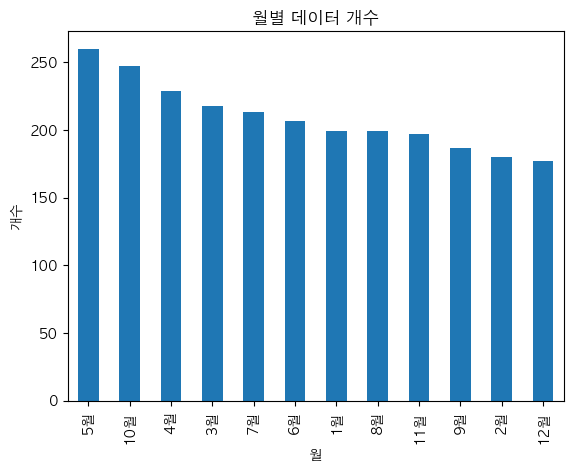

In [84]:
# 월별 데이터 시각화
month_counts.plot(kind='bar')
plt.title('월별 데이터 개수')
plt.xlabel('월')
plt.ylabel('개수')
plt.show()

5월달과 10월달이 가장 많았다. 5월에는 어린이날이 있고 10월달에는 단풍구경 때문에 어린이대공원이 목적지인 교통량이 많을 것으로 추정
어린이대공원의 교통량이 몇 월달에 가장 많은지 조사해보면 될듯!

3. 날씨에 따른 사고량

In [69]:
weather_counts = data['기상상태'].value_counts()
print(weather_counts)

기상상태
맑음    2302
비      124
흐림      66
기타      17
눈        4
Name: count, dtype: int64


전체 데이터 중에선 비온날씨가 두번째이다. 그렇다면 날씨가 주된 사고원인이 아닌 것일까?

In [70]:
# '기상상태' 열에서 '비'인 데이터만 필터링
rain_data = data[data['기상상태'] == '비']
print(rain_data.shape)

(124, 24)


In [71]:
rain_data_month_counts = rain_data['월'].value_counts()
print(rain_data_month_counts)

월
8월     24
5월     19
7월     18
9월     15
3월     13
6월      9
11월     7
10월     7
2월      4
4월      4
1월      3
12월     1
Name: count, dtype: int64


비가 많이 내리는 7월,8월에서만 하루평균 0.77, 0.58건이 일어난다. 이는 다른 월에 비해 명확하게 높은 수치이다. (사고율이 자체적으로 높은 5월달은 제외)

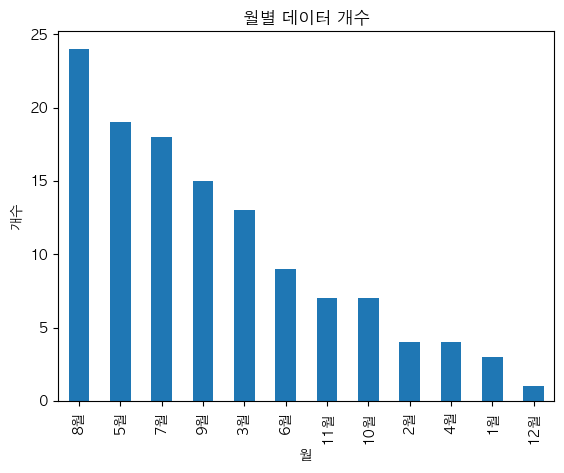

In [85]:
# 월별 비올때의 데이터 시각화

rain_data_month_counts.plot(kind='bar')
plt.title('월별 데이터 개수')
plt.xlabel('월')
plt.ylabel('개수')
plt.show()

4. 나이대에 따른 사고량 (가해차량)

In [73]:
offender_age_counts = data['가해운전자 연령대'].value_counts()
print(offender_age_counts)

가해운전자 연령대
51-60세    507
21-30세    421
31-40세    416
65세 이상    400
41-50세    375
61-64세    215
20세 이하    104
기타불명       75
Name: count, dtype: int64


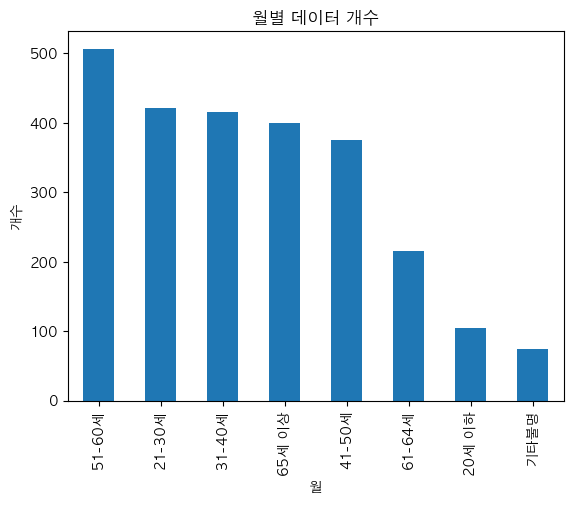

In [86]:
# 나이대에 따른 사고량(가해차량)의 데이터 시각화

offender_age_counts.plot(kind='bar')
plt.title('월별 데이터 개수')
plt.xlabel('월')
plt.ylabel('개수')
plt.show()

5. 사고유형에 따른 사고량

In [75]:
road_shape_counts = data['사고유형'].value_counts()
print(road_shape_counts)

사고유형
차대차 - 충돌             971
차대차 - 기타             512
차대차 - 추돌             401
차대사람 - 기타            303
차대사람 - 횡단중           135
차대사람 - 차도통행중          49
차량단독 - 기타             47
차대사람 - 보도통행중          42
차대사람 - 길가장자리구역통행중     33
차량단독 - 충돌             14
차량단독 - 전도전복            6
Name: count, dtype: int64


전체 2500여개의 데이터 중 차대차가 1880개로 매우 높다. 차대차의 데이터만 살펴보는 과정이 필요할 듯?

In [76]:
road_type_data = data['도로형태'].value_counts()
print(road_type_data)

도로형태
단일로 - 기타           1203
교차로 - 교차로안          518
기타 - 기타             318
교차로 - 교차로부근         312
교차로 - 교차로횡단보도내       68
단일로 - 교량             62
단일로 - 고가도로위          13
주차장 - 주차장            13
단일로 - 지하차도(도로)내       4
단일로 - 터널              2
Name: count, dtype: int64


도로형태는 교차로에서 사고형태가 가장 높을 것이라고 생각했는데 단일로에서 사고가 가장 많았다.
이는 어린이대공원을 향한 교통량 증가로 인해 교차로부근에서 사고가 가장 많을 것이라는 가설을 반증하는 결과이다.
교통사고 다발구간인 건대입구역과 군자입구역에서의 사고내역을 조사해보자 또한 교통사고량이 많은 지역들도 찾아보자.

아래의 과정은 교통사고분석시스템에서 20₩22년까지 광진구의 사고다발구간인 군자역과 건대입구역(20년도의 군자역은 사고다발구간이 아님)의 csv데이터들을 불러온 후 사고번호의 대조를 통하여 20₩22년도까지의 광진구 전체 사고데이터에서 건대입구역과 군자역에서의 사고를 선별하여 새로운 피쳐 '특정장소'에 장소를 저장한 것이다. 
따라서 건대입구역과 군자역에서 반경 150m까지의 데이터 분석이므로 교통사고 다발구간과 비다발구간의 차이를 알아내는것이 궁극적인 목표이다.

In [77]:
kondae_20 = pd.read_csv('20년건대입구사고내역.csv', encoding = 'UTF - 8')
kondae_21 = pd.read_csv('21년건대입구사고내역.csv', encoding = 'UTF - 8')
kondae_22 = pd.read_csv('22년건대입구사고내역.csv', encoding = 'UTF - 8')
#20년도 군자역은 사고다발구간이 아니였음
gunja_21 = pd.read_csv('21년군자역사고내역.csv', encoding = 'UTF - 8')
gunja_22 = pd.read_csv('22년군자역사고내역.csv', encoding = 'UTF - 8')

In [78]:
kondae = pd.concat([kondae_20,kondae_21,kondae_22], ignore_index = True)
gunja = pd.concat([gunja_21,gunja_22], ignore_index = True)

In [79]:
# 건대입구역, 군자역 사고 데이터의 사고번호 리스트 추출
kondae_accident_numbers = set(kondae['사고번호'].tolist())  # 건대입구역 사고번호
gunja_accident_numbers = set(gunja['사고번호'].tolist())   # 군자역 사고번호

# '특정장소' 컬럼 추가
def determine_location(accident_number):
    if accident_number in kondae_accident_numbers:
        return '건대입구'
    elif accident_number in gunja_accident_numbers:
        return '군자역'
    else:
        return '미상'

# '특정장소' 칼럼 생성
data['특정장소'] = data['사고번호'].apply(determine_location)

In [80]:
# DataFrame을 CSV 파일로 저장
data.to_csv('data.csv', index=False, encoding='utf-8-sig')

In [81]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 출력

/Users/yugeon/YG2127/PycharmProjects/sai/1208


이제 데이터 구현을 했으니 교통사고다발구간들의 특징점을 알아보자

In [82]:
specific_counts = data['특정장소'].value_counts()
print(specific_counts)

특정장소
미상      2366
건대입구      97
군자역       50
Name: count, dtype: int64
